In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import umap



c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_combined_stc_z = pd.read_csv(os.path.join(folder_path, "features_combined_stc_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_combined_stc_mm= pd.read_csv(os.path.join(folder_path, "features_combined_stc_minmax.csv"))

#se quitan las columnas 'filename' y 'label'
df_combined_stc_mm_cl= df_combined_stc_mm.drop(columns=['label'])
df_combined_stc_z_cl= df_combined_stc_z.drop(columns=['label'])


Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

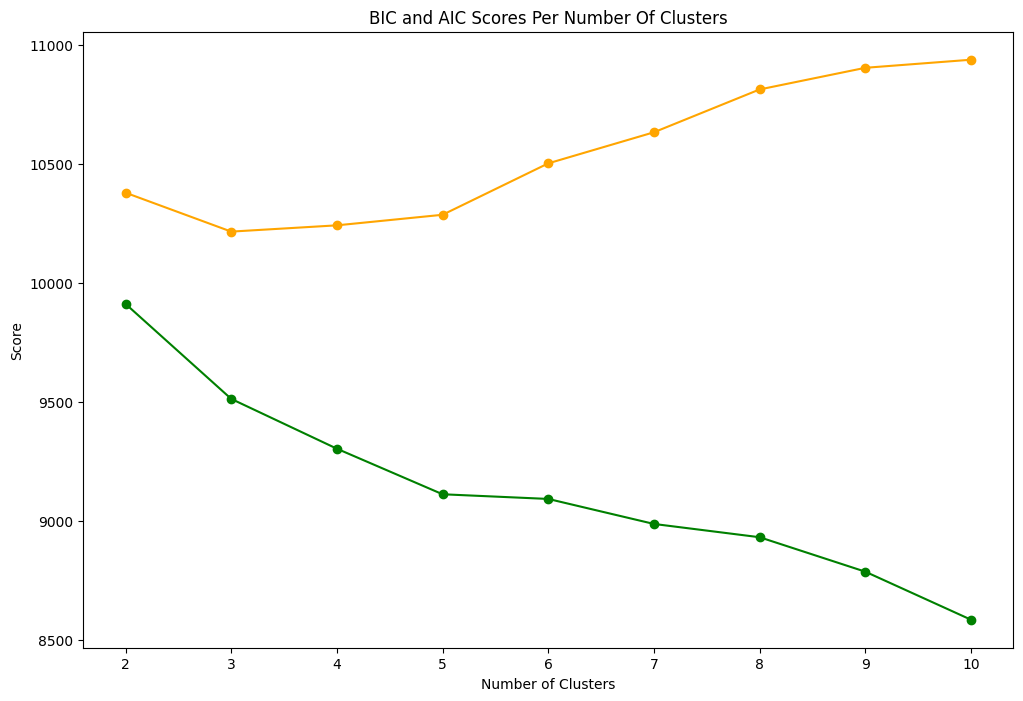

In [3]:
# Set up a range of cluster numbers to try
n_range = range(2,11)
# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(df_combined_stc_z_cl)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(df_combined_stc_z_cl))
    aic_score.append(gm.aic(df_combined_stc_z_cl))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')


In [20]:
n_components = 2  # Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_z = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models_z.items():
    gmm_model.fit(df_combined_stc_z_cl)


covariances_z = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models_z.items()}

predictions_z = {cov_type: gmm_model.predict(df_combined_stc_z_cl)
               for cov_type, gmm_model in gmm_models_z.items()}

Covariance Matrix (full - Component):
[[ 1.57707446 -0.73642671  0.21331641 -0.14761093  0.47044938 -0.87134365
   0.3494763  -0.84304982 -0.17730655]
 [-0.73642671  1.54505217 -0.25850596 -0.06010701 -0.59087055  1.05194761
  -0.58924224  0.99426816 -0.12778431]
 [ 0.21331641 -0.25850596  0.20837007  0.11999284  0.21557315 -0.18663976
  -0.08242134  0.13146814  0.31182573]
 [-0.14761093 -0.06010701  0.11999284  1.13540706  0.30770896 -0.51386953
  -0.42663659  0.5070746   0.67852818]
 [ 0.47044938 -0.59087055  0.21557315  0.30770896  1.26248392 -1.18923871
  -0.06892349 -0.2390177   0.09852577]
 [-0.87134365  1.05194761 -0.18663976 -0.51386953 -1.18923871  1.96331739
  -0.28431392  0.85329272 -0.00959488]
 [ 0.3494763  -0.58924224 -0.08242134 -0.42663659 -0.06892349 -0.28431392
   2.59163137 -1.37618872 -1.2250767 ]
 [-0.84304982  0.99426816  0.13146814  0.5070746  -0.2390177   0.85329272
  -1.37618872  2.05733285  0.90201199]
 [-0.17730655 -0.12778431  0.31182573  0.67852818  0.09852

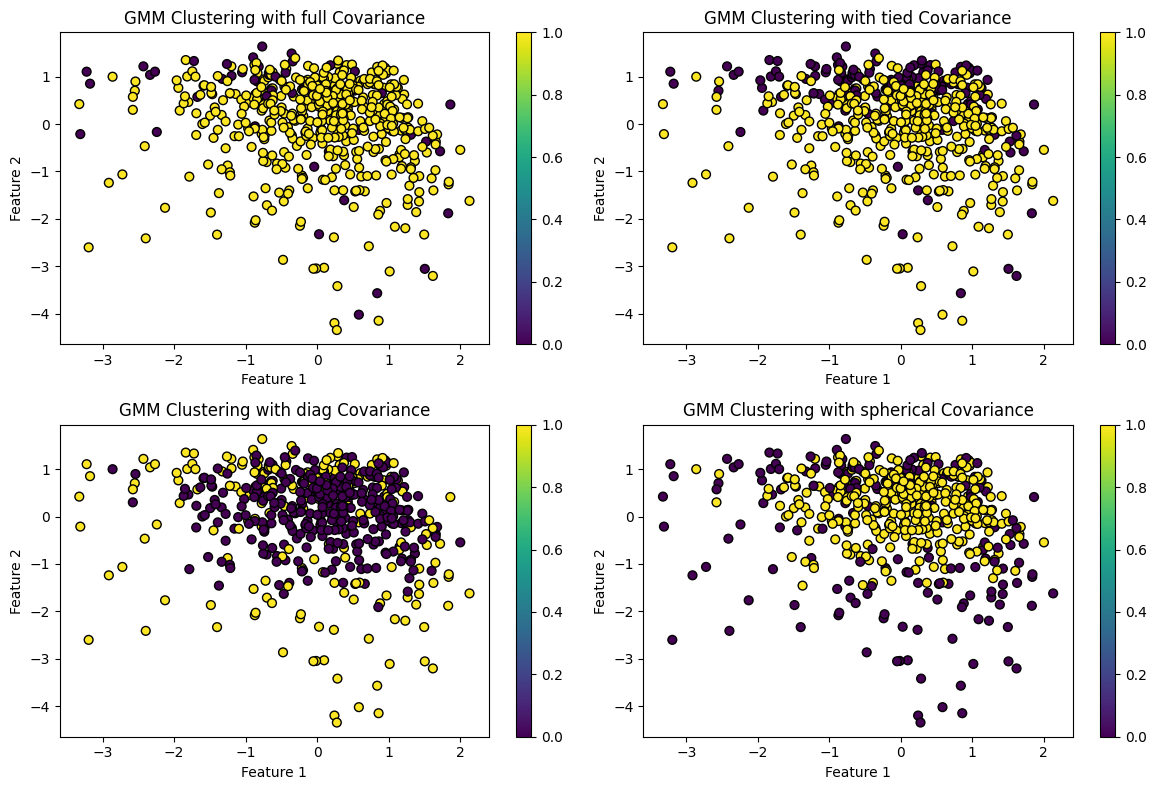

In [21]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_z.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_combined_stc_z_cl.iloc[:, 0], df_combined_stc_z_cl.iloc[:, 1], c=predictions_z[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    
    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances_z[cov_type][0]}')

plt.tight_layout()
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


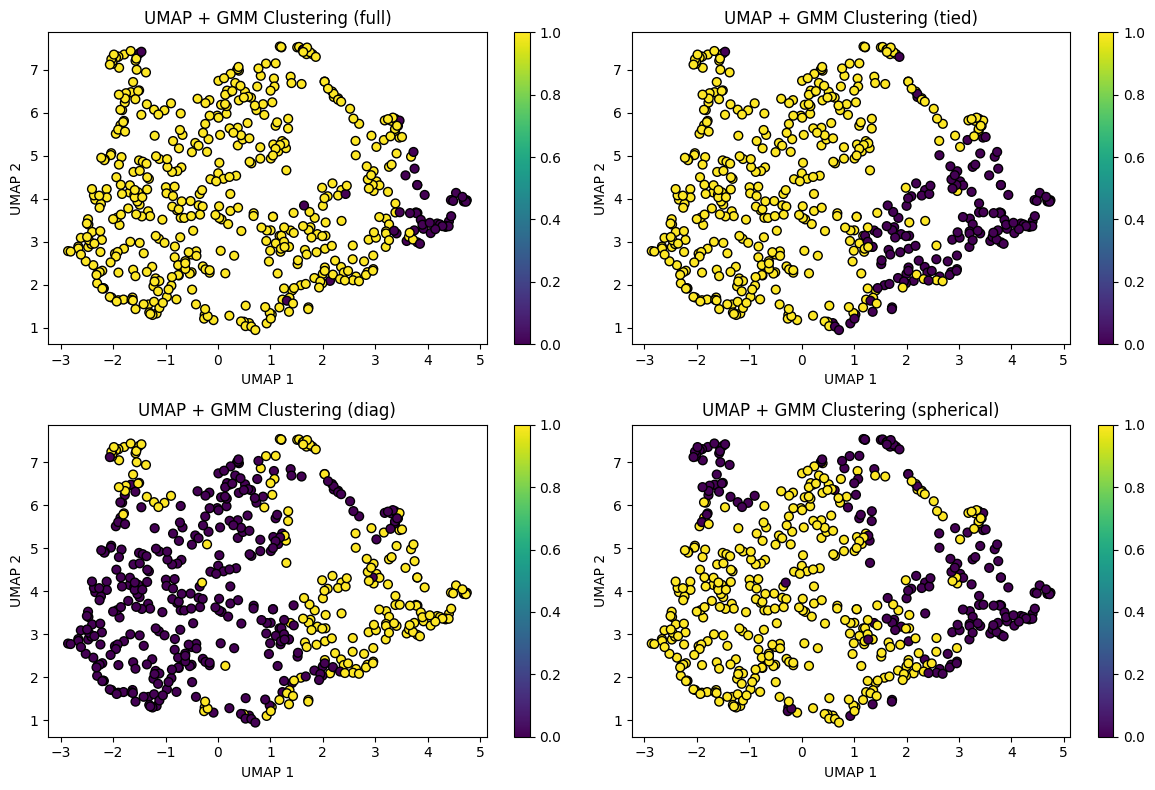

In [22]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_combined_stc_z_cl)

plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_z.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(embedding[:, 0], embedding[:, 1], 
                c=predictions_z[cov_type], 
                cmap='viridis', edgecolors='k', s=40)
    plt.title(f'UMAP + GMM Clustering ({cov_type})')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

plt.tight_layout()
plt.show()


In [18]:
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score = silhouette_score(df_combined_stc_z_cl, predictions_z[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score:.3f}")


--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.257
Tied covariance: Silhouette Score = 0.285
Diag covariance: Silhouette Score = 0.225
Spherical covariance: Silhouette Score = 0.222


In [23]:
df_combined_stc_z['predictions_z_full'] = predictions_z['full']
df_combined_stc_z['predictions_z_tied'] = predictions_z['tied']
df_combined_stc_z['predictions_z_diag'] = predictions_z['diag']
df_combined_stc_z['predictions_z_spherical'] = predictions_z['spherical']

# Crear las tablas de contingencia para cada tipo de covarianza
contingency_full = pd.crosstab(df_combined_stc_z['label'], df_combined_stc_z['predictions_z_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_tied = pd.crosstab(df_combined_stc_z['label'], df_combined_stc_z['predictions_z_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_diag = pd.crosstab(df_combined_stc_z['label'], df_combined_stc_z['predictions_z_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_spherical = pd.crosstab(df_combined_stc_z['label'], df_combined_stc_z['predictions_z_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])

# Mostrar las tablas de contingencia
print("Contingency Table for Full Covariance:")
print(contingency_full)

print("\nContingency Table for Tied Covariance:")
print(contingency_tied)

print("\nContingency Table for Diagonal Covariance:")
print(contingency_diag)

print("\nContingency Table for Spherical Covariance:")
print(contingency_spherical)

Contingency Table for Full Covariance:
Cluster (full)   0    1
Label                  
higher           0  268
smaller         50  219

Contingency Table for Tied Covariance:
Cluster (tied)    0    1
Label                   
higher            0  268
smaller         143  126

Contingency Table for Diagonal Covariance:
Cluster (diag)    0    1
Label                   
higher          241   27
smaller          96  173

Contingency Table for Spherical Covariance:
Cluster (spherical)    0    1
Label                        
higher                36  232
smaller              150  119


con diag si que se pueden ver dos grupos, pero aun así la silueta no es buena.

Min-max:

Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

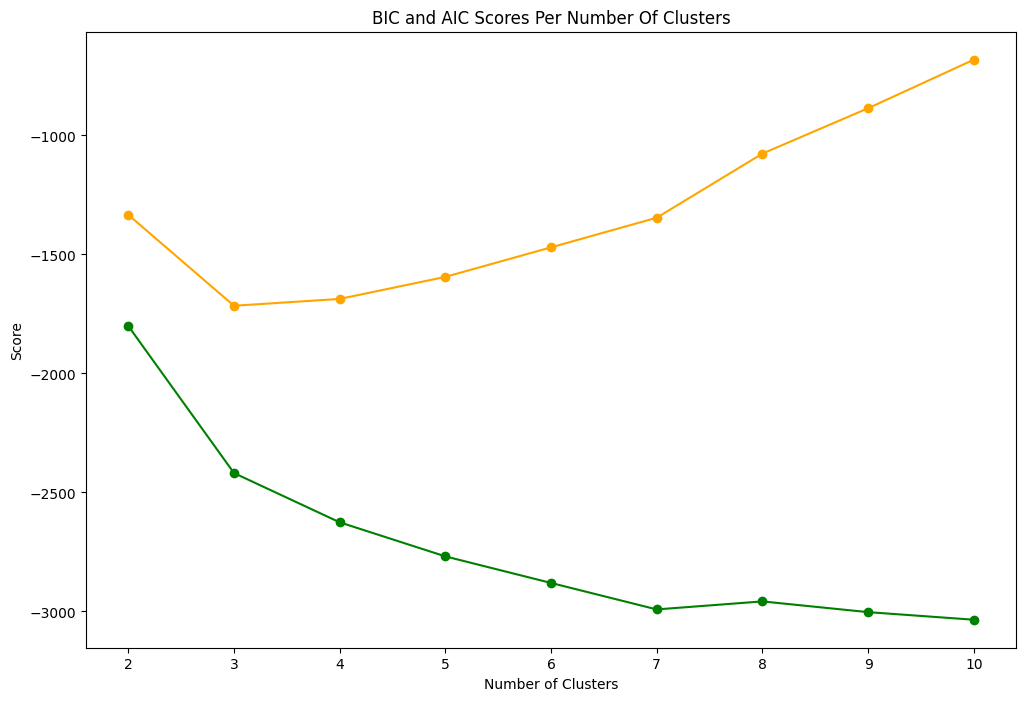

In [9]:
# Set up a range of cluster numbers to try
n_range = range(2,11)
# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(df_combined_stc_mm_cl)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(df_combined_stc_mm_cl))
    aic_score.append(gm.aic(df_combined_stc_mm_cl))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')

In [10]:
n_components = 2  # Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_mm = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models_mm.items():
    gmm_model.fit(df_combined_stc_mm_cl)


covariances_mm = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models_mm.items()}

predictions_mm = {cov_type: gmm_model.predict(df_combined_stc_mm_cl)
               for cov_type, gmm_model in gmm_models_mm.items()}

Covariance Matrix (full - Component):
[[ 0.02876243 -0.00407244  0.01393077  0.00418394  0.01871944 -0.01943431
  -0.00256249  0.00267547  0.00545216]
 [-0.00407244  0.01085971 -0.01444793 -0.00767195 -0.02857578  0.01375533
   0.00129871 -0.00355268 -0.00562377]
 [ 0.01393077 -0.01444793  0.04450463 -0.01404539  0.01039095  0.03972281
  -0.00805841  0.01472451  0.02022665]
 [ 0.00418394 -0.00767195 -0.01404539  0.69090276 -0.09019385 -0.20748572
   0.01715943  0.00080054 -0.00682397]
 [ 0.01871944 -0.02857578  0.01039095 -0.09019385  0.66685926 -0.32547607
  -0.02024424  0.00484794  0.01413628]
 [-0.01943431  0.01375533  0.03972281 -0.20748572 -0.32547607  0.46076122
   0.00446104  0.00901995  0.00966938]
 [-0.00256249  0.00129871 -0.00805841  0.01715943 -0.02024424  0.00446104
   0.0112546  -0.00516792 -0.01069459]
 [ 0.00267547 -0.00355268  0.01472451  0.00080054  0.00484794  0.00901995
  -0.00516792  0.00930168  0.01040628]
 [ 0.00545216 -0.00562377  0.02022665 -0.00682397  0.01413

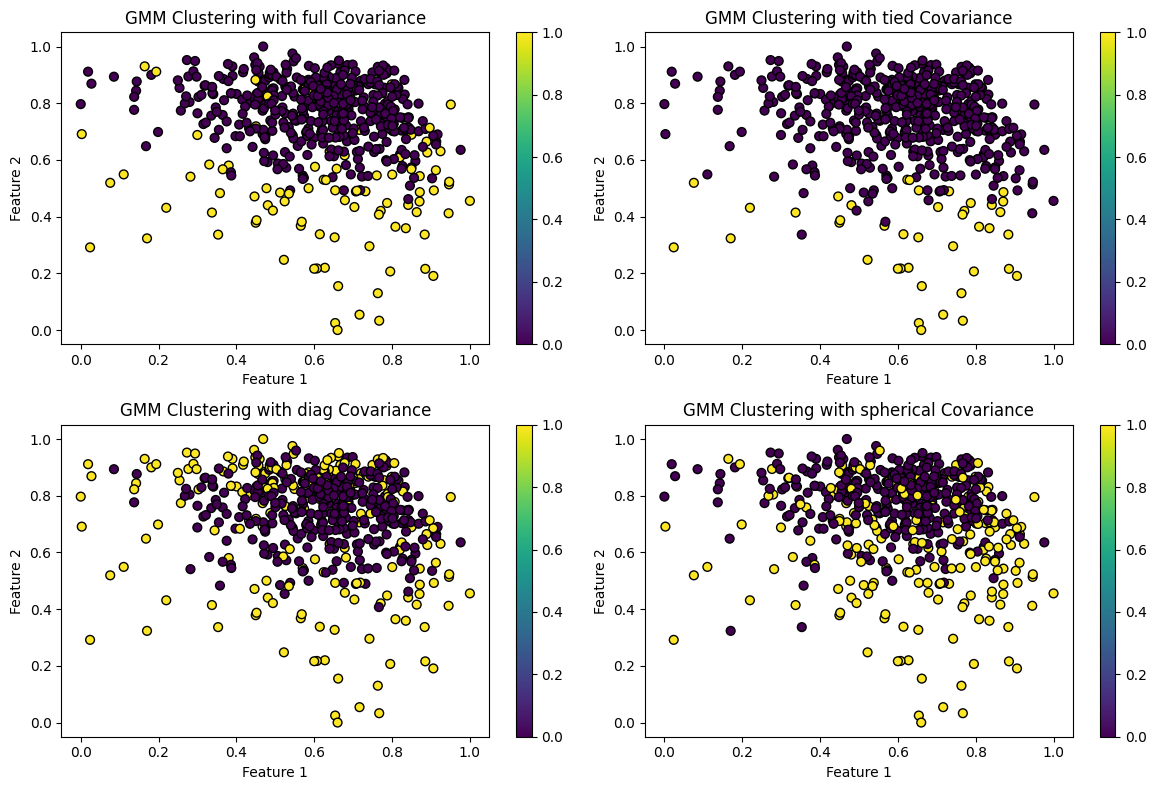

In [11]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_mm.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_combined_stc_mm_cl.iloc[:, 0], df_combined_stc_mm_cl.iloc[:, 1], c=predictions_mm[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    
    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances_mm[cov_type][0]}')

plt.tight_layout()
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


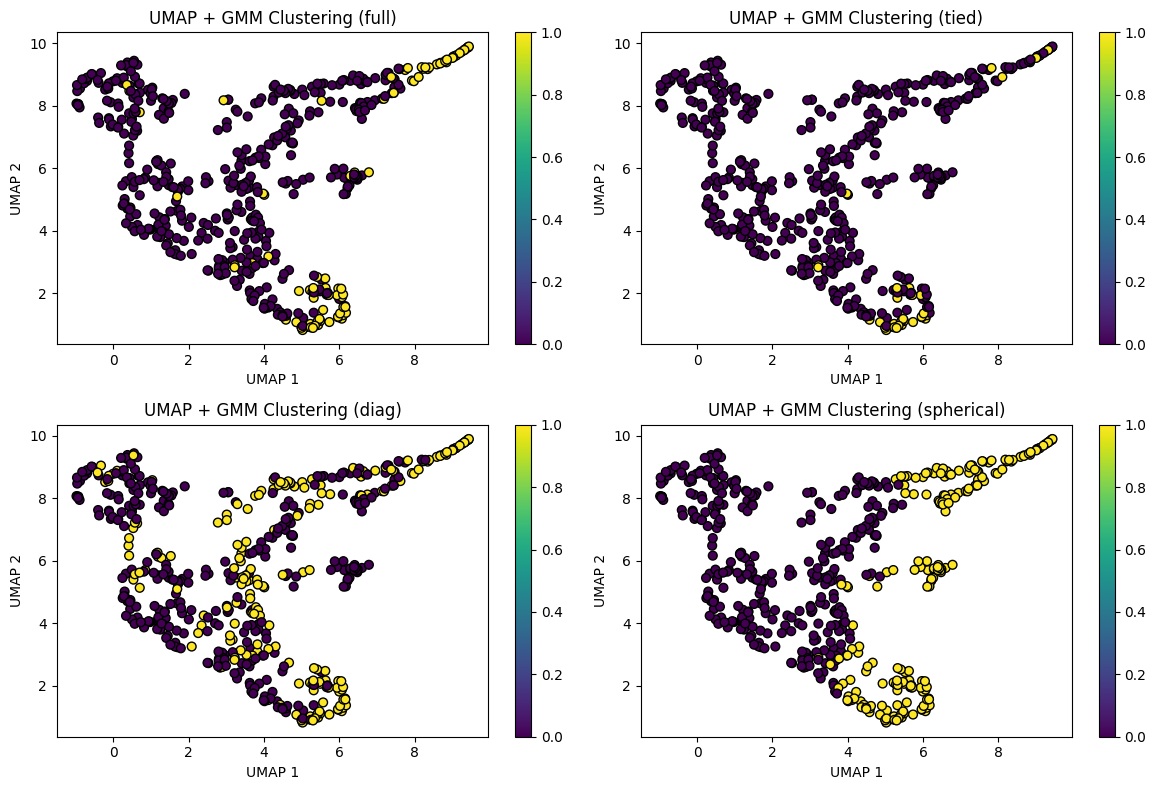

In [12]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_combined_stc_mm_cl)

plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_mm.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(embedding[:, 0], embedding[:, 1], 
                c=predictions_mm[cov_type], 
                cmap='viridis', edgecolors='k', s=40)
    plt.title(f'UMAP + GMM Clustering ({cov_type})')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

plt.tight_layout()
plt.show()

In [13]:
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score = silhouette_score(df_combined_stc_mm_cl, predictions_mm[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score:.3f}")


--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.359
Tied covariance: Silhouette Score = 0.346
Diag covariance: Silhouette Score = 0.123
Spherical covariance: Silhouette Score = 0.340


In [14]:
df_combined_stc_mm['predictions_z_full'] = predictions_mm['full']
df_combined_stc_mm['predictions_z_tied'] = predictions_mm['tied']
df_combined_stc_mm['predictions_z_diag'] = predictions_mm['diag']
df_combined_stc_mm['predictions_z_spherical'] = predictions_mm['spherical']

# Crear las tablas de contingencia para cada tipo de covarianza
contingency_full = pd.crosstab(df_combined_stc_mm['label'], df_combined_stc_mm['predictions_z_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_tied = pd.crosstab(df_combined_stc_mm['label'], df_combined_stc_mm['predictions_z_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_diag = pd.crosstab(df_combined_stc_mm['label'], df_combined_stc_mm['predictions_z_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_spherical = pd.crosstab(df_combined_stc_mm['label'], df_combined_stc_mm['predictions_z_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])

# Mostrar las tablas de contingencia
print("Contingency Table for Full Covariance:")
print(contingency_full)

print("\nContingency Table for Tied Covariance:")
print(contingency_tied)

print("\nContingency Table for Diagonal Covariance:")
print(contingency_diag)

print("\nContingency Table for Spherical Covariance:")
print(contingency_spherical)

Contingency Table for Full Covariance:
Cluster (full)    0   1
Label                  
higher          238  30
smaller         206  63

Contingency Table for Tied Covariance:
Cluster (tied)    0   1
Label                  
higher          255  13
smaller         241  28

Contingency Table for Diagonal Covariance:
Cluster (diag)    0    1
Label                   
higher          241   27
smaller          96  173

Contingency Table for Spherical Covariance:
Cluster (spherical)    0    1
Label                        
higher               189   79
smaller              150  119


con la normalizacion min-max con el método diag también se pueden ver dos clusteres pero no muy bien separados.

UMAP para reducir la dimensionalidad y ver si se puede ver mejro:

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_14760\1811882003.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_z_umap[:, 0], X_umap_z_umap[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


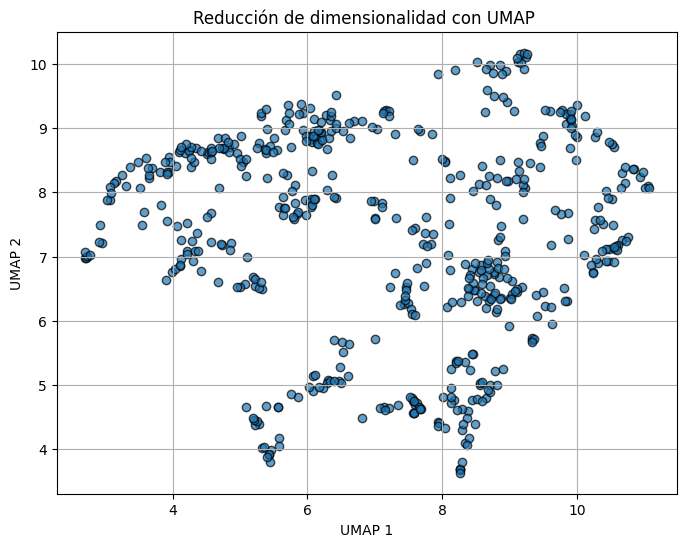

In [47]:
# Aplicar UMAP a los datos ya estandarizados y sin columnas no numéricas
umap_z_umap = umap.UMAP(n_neighbors=6,n_components=3, random_state=42) 
X_umap_z_umap = umap_z_umap.fit_transform(df_combined_stc_z_cl)

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_z_umap[:, 0], X_umap_z_umap[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [50]:
n_components = 2  # Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_z = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models_z.items():
    gmm_model.fit(X_umap_z_umap)


covariances_z = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models_z.items()}

predictions_z = {cov_type: gmm_model.predict(X_umap_z_umap)
               for cov_type, gmm_model in gmm_models_z.items()}

Covariance Matrix (full - Component 0):
[[1.60681044 0.55688515 0.5938184 ]
 [0.55688515 0.66202616 0.79026175]
 [0.5938184  0.79026175 1.56858855]]
Covariance Matrix (tied - Component 0):
[1.70167892 1.00738359 0.23940291]
Covariance Matrix (diag - Component 0):
[1.08118569 0.60764226 1.39391136]
Covariance Matrix (spherical - Component 0):
1.0140025853035735


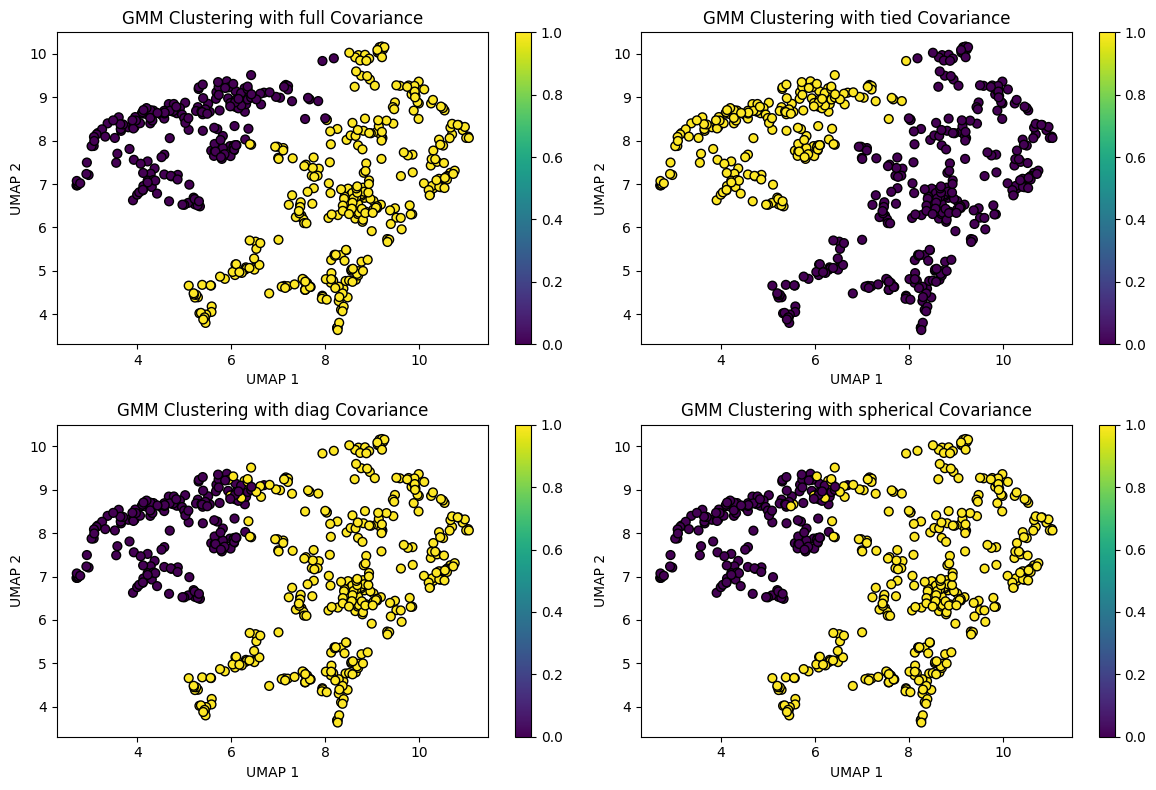

In [51]:
plt.figure(figsize=(12, 8))

for i, cov_type in enumerate(covariance_types, 1):
    plt.subplot(2, 2, i)
    plt.scatter(
        X_umap_z_umap[:, 0], X_umap_z_umap[:, 1],
        c=predictions_z[cov_type],
        cmap='viridis', edgecolors='k', s=40
    )
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

    print(f'Covariance Matrix ({cov_type} - Component 0):\n{covariances_z[cov_type][0]}')

plt.tight_layout()
plt.show()



In [53]:

# Silhouette scores
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score = silhouette_score(X_umap_z_umap, predictions_z[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score:.3f}")

# Crear una copia del DataFrame que contiene las etiquetas verdaderas (label)
# y que tiene la misma forma que X_umap_z_umap
df_umap_results = df_combined_stc_z.copy()
df_umap_results['predictions_z_full'] = predictions_z['full']
df_umap_results['predictions_z_tied'] = predictions_z['tied']
df_umap_results['predictions_z_diag'] = predictions_z['diag']
df_umap_results['predictions_z_spherical'] = predictions_z['spherical']

# Crear las tablas de contingencia para cada tipo de covarianza
contingency_full = pd.crosstab(df_umap_results['label'], df_umap_results['predictions_z_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_tied = pd.crosstab(df_umap_results['label'], df_umap_results['predictions_z_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_diag = pd.crosstab(df_umap_results['label'], df_umap_results['predictions_z_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_spherical = pd.crosstab(df_umap_results['label'], df_umap_results['predictions_z_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])

# Mostrar las tablas de contingencia
print("\nContingency Table for Full Covariance:")
print(contingency_full)

print("\nContingency Table for Tied Covariance:")
print(contingency_tied)

print("\nContingency Table for Diagonal Covariance:")
print(contingency_diag)

print("\nContingency Table for Spherical Covariance:")
print(contingency_spherical)



--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.396
Tied covariance: Silhouette Score = 0.399
Diag covariance: Silhouette Score = 0.381
Spherical covariance: Silhouette Score = 0.380

Contingency Table for Full Covariance:
Cluster (full)    0    1
Label                   
higher           12  256
smaller         195   74

Contingency Table for Tied Covariance:
Cluster (tied)    0    1
Label                   
higher          258   10
smaller          72  197

Contingency Table for Diagonal Covariance:
Cluster (diag)    0    1
Label                   
higher            8  260
smaller         165  104

Contingency Table for Spherical Covariance:
Cluster (spherical)    0    1
Label                        
higher                 7  261
smaller              164  105


umap + minmax

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_14760\3894638219.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm_umap[:, 0], X_umap_mm_umap[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


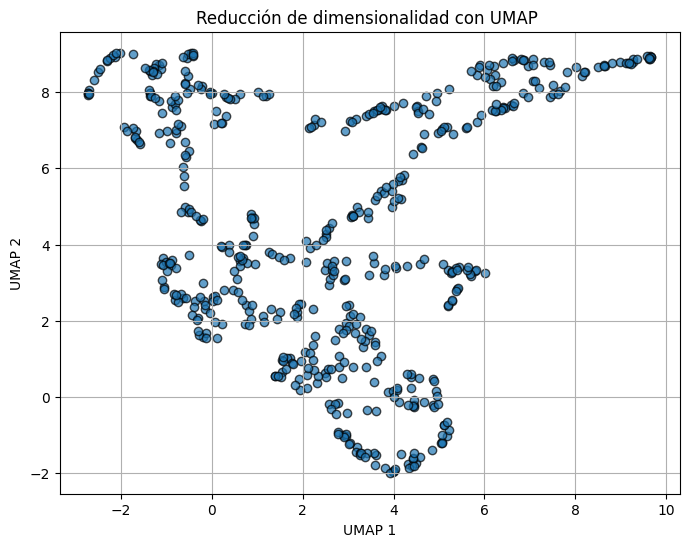

In [57]:
# Aplicar UMAP a los datos ya estandarizados y sin columnas no numéricas
umap_mm_umap = umap.UMAP(n_neighbors=7,n_components=2, random_state=42) 
X_umap_mm_umap = umap_mm_umap.fit_transform(df_combined_stc_mm_cl)

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm_umap[:, 0], X_umap_mm_umap[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [62]:
n_components = 3  # Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_mm = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models_mm.items():
    gmm_model.fit(X_umap_mm_umap)


covariances_mm = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models_mm.items()}

predictions_mm = {cov_type: gmm_model.predict(X_umap_mm_umap)
               for cov_type, gmm_model in gmm_models_mm.items()}

Covariance Matrix (full - Component 0):
[[3.842049   1.01886748]
 [1.01886748 0.45199798]]
Covariance Matrix (tied - Component 0):
[ 3.16526488 -0.63211472]
Covariance Matrix (diag - Component 0):
[4.16469787 0.41764648]
Covariance Matrix (spherical - Component 0):
1.891171770991483


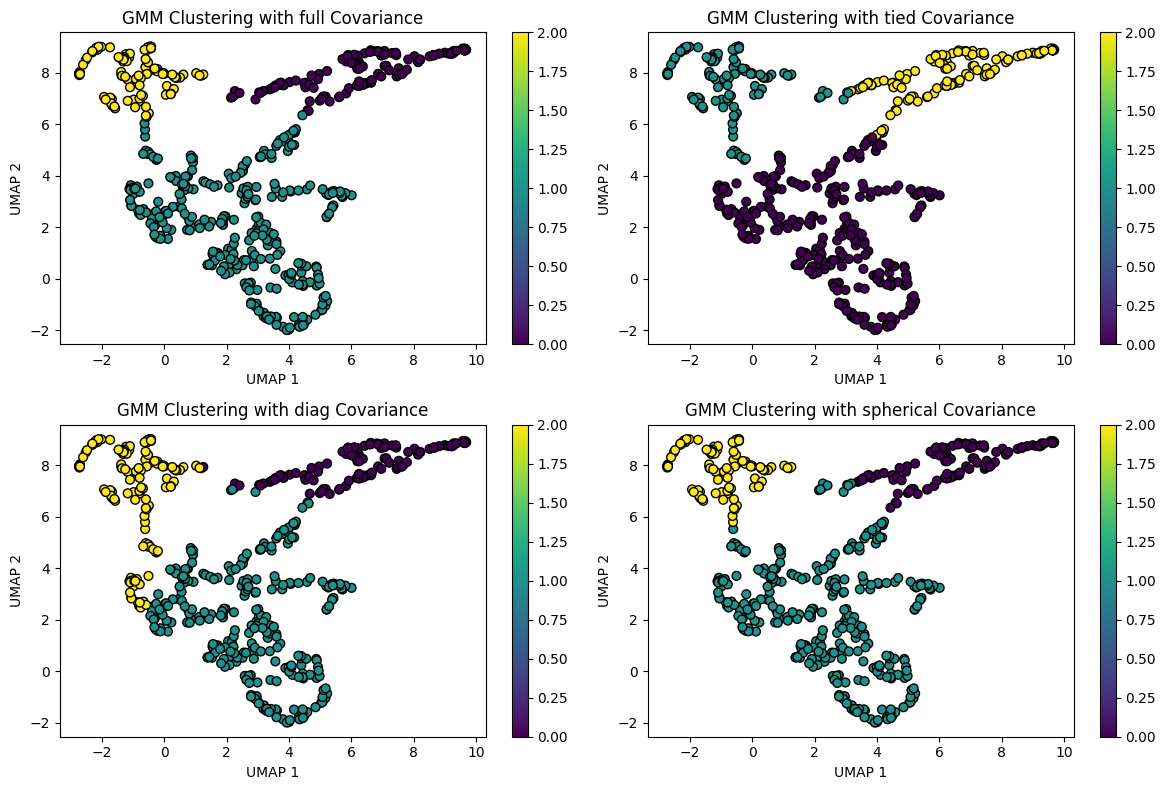

In [63]:
plt.figure(figsize=(12, 8))

for i, cov_type in enumerate(covariance_types, 1):
    plt.subplot(2, 2, i)
    plt.scatter(
        X_umap_mm_umap[:, 0], X_umap_mm_umap[:, 1],
        c=predictions_mm[cov_type],
        cmap='viridis', edgecolors='k', s=40
    )
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

    print(f'Covariance Matrix ({cov_type} - Component 0):\n{covariances_mm[cov_type][0]}')

plt.tight_layout()
plt.show()

In [65]:
# Silhouette scores
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score = silhouette_score(X_umap_mm_umap, predictions_mm[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score:.3f}")

# Crear una copia del DataFrame que contiene las etiquetas verdaderas (label)
# y que tiene la misma forma que X_umap_z_umap
df_umap_results = df_combined_stc_mm.copy()
df_umap_results['predictions_z_full'] = predictions_mm['full']
df_umap_results['predictions_z_tied'] = predictions_mm['tied']
df_umap_results['predictions_z_diag'] = predictions_mm['diag']
df_umap_results['predictions_z_spherical'] = predictions_mm['spherical']

# Crear las tablas de contingencia para cada tipo de covarianza
contingency_full = pd.crosstab(df_umap_results['label'], df_umap_results['predictions_z_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_tied = pd.crosstab(df_umap_results['label'], df_umap_results['predictions_z_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_diag = pd.crosstab(df_umap_results['label'], df_umap_results['predictions_z_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_spherical = pd.crosstab(df_umap_results['label'], df_umap_results['predictions_z_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])

# Mostrar las tablas de contingencia
print("\nContingency Table for Full Covariance:")
print(contingency_full)

print("\nContingency Table for Tied Covariance:")
print(contingency_tied)

print("\nContingency Table for Diagonal Covariance:")
print(contingency_diag)

print("\nContingency Table for Spherical Covariance:")
print(contingency_spherical)



--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.514
Tied covariance: Silhouette Score = 0.524
Diag covariance: Silhouette Score = 0.487
Spherical covariance: Silhouette Score = 0.514

Contingency Table for Full Covariance:
Cluster (full)   0    1   2
Label                      
higher          33  158  77
smaller         85  165  19

Contingency Table for Tied Covariance:
Cluster (tied)    0   1   2
Label                      
higher          151  78  39
smaller         154  38  77

Contingency Table for Diagonal Covariance:
Cluster (diag)   0    1   2
Label                      
higher          33  142  93
smaller         81  154  34

Contingency Table for Spherical Covariance:
Cluster (spherical)   0    1   2
Label                           
higher               34  157  77
smaller              76  172  21
